# Colossus examples

Based on https://bdiemer.bitbucket.io/colossus/_static/tutorial_cosmology.html


Import python modules

In [1]:
import math
import mpmath
import numpy as np
import pdb
import matplotlib.pyplot as plt
import scipy
import scipy.special
import scipy.stats
from colossus.cosmology import cosmology
from colossus.lss import bias


In [2]:
cosmo = cosmology.setCosmology('planck18')
print(cosmo)
print(cosmo.age(0.0))

Cosmology "planck18" 
    flat = True, Om0 = 0.3111, Ode0 = 0.6888, Ob0 = 0.0490, H0 = 67.66, sigma8 = 0.8102, ns = 0.9665
    de_model = lambda, relspecies = True, Tcmb0 = 2.7255, Neff = 3.0460, powerlaw = False
13.786218174076355


## Power spectrum

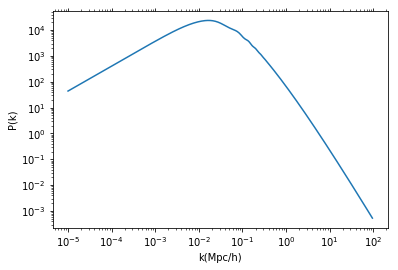

In [13]:
k = 10**np.arange(-5,2,0.02)
Pk = cosmo.matterPowerSpectrum(k)

plt.figure()
plt.loglog()
plt.xlabel('k(Mpc/h)')
plt.ylabel('P(k)')
plt.plot(k, Pk, '-')

## Correlation function

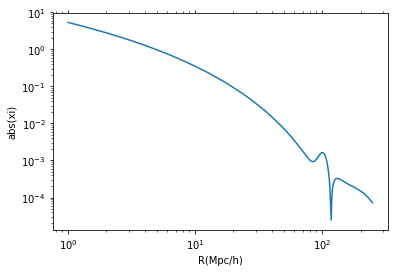

In [14]:
R = 10**np.arange(0,2.4,0.005)
xi = cosmo.correlationFunction(R, 0.0)

plt.figure()
plt.loglog()
plt.xlabel('R(Mpc/h)')
plt.ylabel('abs(xi)')
plt.plot(R, np.abs(xi), '-')

## Halo bias

Text(0, 0.5, 'bias')

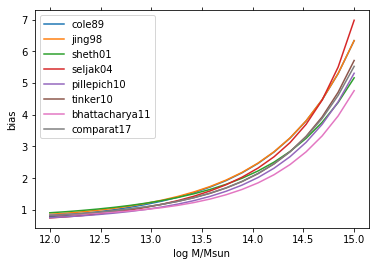

In [22]:
lgM = np.linspace(12, 15, 20)
plt.figure()
#plt.loglog()
for model in bias.models:
    b = bias.haloBias(10**lgM, 0.0, mdef='200m', model=model)
    plt.plot(lgM, b, '-', label=model)
plt.legend()
plt.xlabel('log M/Msun')
plt.ylabel('bias')
